# Assignment 1

#### Fandi Yi 
#### 260722217

# Setup

In [99]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#Suppress all warning
import warnings
warnings.filterwarnings("ignore")
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:/Users/fandi/Desktop/Untitled Folder 1/"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Get the data

### 1. Get the dataset from local csv file
Source: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset?select=movie_metadata.csv

In [2]:
import pandas as pd
df1=pd.read_csv('http://data.insideairbnb.com/canada/qc/montreal/2020-12-18/data/listings.csv.gz')

In [3]:
df1.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20201218200147,2020-12-31,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Although my place is centrally located in Le P...,https://a0.muscache.com/pictures/88170231/0e5b...,2277,https://www.airbnb.com/users/show/2277,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.16
1,29059,https://www.airbnb.com/rooms/29059,20201218200147,2020-12-19,Lovely studio Quartier Latin,"Lovely studio with 1 closed room, near everyth...",NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,https://www.airbnb.com/users/show/125031,...,10.0,10.0,10.0,NaN,f,2,2,0,0,2.58
2,29061,https://www.airbnb.com/rooms/29061,20201218200147,2020-12-19,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...,NaN,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,https://www.airbnb.com/users/show/125031,...,9.0,10.0,9.0,NaN,t,2,2,0,0,0.64
3,31847,https://www.airbnb.com/rooms/31847,20201218200147,2021-01-01,Downtown/Airport room,Come stay in this trendy area of downtown Mont...,The Atwater Market area of downtown is a real ...,https://a0.muscache.com/pictures/e6a520fd-f424...,2319,https://www.airbnb.com/users/show/2319,...,10.0,10.0,10.0,NaN,t,5,1,4,0,1.19
4,34715,https://www.airbnb.com/rooms/34715,20201218200147,2020-12-19,Chez Patrac ! Métro Beaubien,Welcome to Montreal<br /><br />Looking for an ...,NaN,https://a0.muscache.com/pictures/1209820/5968a...,149769,https://www.airbnb.com/users/show/149769,...,10.0,8.0,9.0,NaN,f,1,1,0,0,0.03


- Pick the valuable columns (not the columns with unique value for each row)

In [4]:
df1.drop(df1.columns[np.r_[0:3,6:10,12,18:22,24,26,28,34,31,42:55,56,61:68,69:73]], axis=1, inplace=True)

In [5]:
df1.head()

,last_scraped,name,description,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month
0,2020-12-31,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Nelia,2008-08-19,"Honest, quiet and adhere to the golden rules a...",NaN,NaN,NaN,f,...,$38.00,2,7,245,0,2011-09-06,2018-09-23,93.0,t,2.16
1,2020-12-19,Lovely studio Quartier Latin,"Lovely studio with 1 closed room, near everyth...",Maryline,2010-05-14,Voyageuse dans l'âme j'aime parcourir le monde...,within an hour,100%,99%,t,...,$169.00,2,60,330,0,2010-06-20,2020-10-27,94.0,f,2.58
2,2020-12-19,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...,Maryline,2010-05-14,Voyageuse dans l'âme j'aime parcourir le monde...,within an hour,100%,99%,t,...,$248.00,3,21,69,0,2012-02-23,2020-11-01,92.0,t,0.64
3,2021-01-01,Downtown/Airport room,Come stay in this trendy area of downtown Mont...,Gail,2008-08-19,Manage a network of downtown rooms and private...,within an hour,100%,100%,f,...,$40.00,2,365,153,0,2010-06-22,2020-01-07,90.0,t,1.19
4,2020-12-19,Chez Patrac ! Métro Beaubien,Welcome to Montreal<br /><br />Looking for an ...,Alain,2010-06-22,Patricia et moi-même aimons rencontrer de nouv...,NaN,NaN,0%,f,...,$135.00,4,5,4,0,2010-11-14,2011-09-12,93.0,f,0.03


In [6]:
corr_matrix=df1.corr()
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
number_of_reviews            0.077354
reviews_per_month            0.049326
latitude                     0.039719
beds                         0.039120
bedrooms                     0.025436
accommodates                 0.022436
minimum_nights               0.006542
maximum_nights               0.000542
number_of_reviews_l30d      -0.002257
longitude                   -0.023580
host_total_listings_count   -0.152649
Name: review_scores_rating, dtype: float64

### 2. Clean/ Processing the dataset

In [7]:
#=======================================================Data Cleansing===================================================
#Only pick the Airbnb apartment with reviews
df1=df1[df1['number_of_reviews'].astype(int)>0]
#Only pick the Airbnb apartment with price
df1=df1[df1['price'].apply(lambda x: len(x)>0)]
#Only pick the Airbnb with the answer(t/f) for "host_is_superhost"
df1=df1[df1['host_is_superhost'].apply(lambda x: len(str(x))==1)]
#Drop other answer except f/t in "instant_bookable"
df1=df1[df1['instant_bookable'].isin(['f','t'])]
#To drop the review score which lower than 21 (potential outliers)
df1=df1[df1['review_scores_rating']>21]
#Replace all the blank cell with NaN value
df1=df1.replace('',np.NaN)
#========================================================Add new features===============================================
#Get the length of the sentence in following five columns (number of words)
df1['name_length']  = df1['name'].apply(lambda x: len(str(x).split()))
df1['description_length']=df1['description'].apply(lambda x: len(str(x).split()))
df1['host_about_length']=df1['host_about'].apply(lambda x: len(str(x).split()))
df1['verifications_length']=df1['host_verifications'].apply(lambda x: len(str(x).split(',')))
df1['amenities_length']=df1['amenities'].apply(lambda x: len(str(x).split(',')))
#Get the difference between the "last_scraped" with the following dates (in days)
df1['host_since_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['host_since'])).dt.days
df1['first_reviews_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['first_review'])).dt.days
df1['last_review_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['last_review'])).dt.days

#Convert price column to the float datatype
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype(float)
#Get the new column to express the price per accommodate
df1['price_per_accommodates']=df1['price']/df1['accommodates'].astype(float)
#=====================================================Change the data type=============================================
#Convert the categorical columns to dummified columns
list_col=['host_is_superhost','host_identity_verified','instant_bookable']
for i in list_col:
    df1[i] = np.where(df1[i]== 't', 1, 0)

In [8]:
#Add the dummified column by extract the word from "amenities" column
df1['has_Hair_dryer']=np.where(df1['amenities'].str.contains('Hair dryer'), 1, 0)
#df[df['date'].astype(str).str.contains('07311954')]


- Apply impute package to fill the missing data in numerical columns

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10150 entries, 0 to 13696
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_scraped               10150 non-null  object 
 1   name                       10146 non-null  object 
 2   description                9899 non-null   object 
 3   host_name                  10150 non-null  object 
 4   host_since                 10150 non-null  object 
 5   host_about                 5783 non-null   object 
 6   host_response_time         5381 non-null   object 
 7   host_response_rate         5381 non-null   object 
 8   host_acceptance_rate       6987 non-null   object 
 9   host_is_superhost          10150 non-null  int32  
 10  host_total_listings_count  10150 non-null  float64
 11  host_verifications         10150 non-null  object 
 12  host_identity_verified     10150 non-null  int32  
 13  neighbourhood_cleansed     10150 non-null  obj

- Remove the text attribute because median can only be calculated on numerical attributes:

In [11]:
df_num=df1.iloc[:,np.r_[9:11,12,14:16,17,19:21,22:27,29:42]]

In [12]:
sample_incomplete_rows = df_num[df_num.isnull().any(axis=1)].head()

In [13]:
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [14]:
imputer.statistics_

array([ 0.000000e+00,  1.000000e+00,  1.000000e+00,  4.551877e+01,
       -7.357944e+01,  3.000000e+00,  1.000000e+00,  1.000000e+00,
        7.800000e+01,  2.000000e+00,  1.125000e+03,  9.000000e+00,
        0.000000e+00,  9.600000e+01,  0.000000e+00,  4.000000e-01,
        6.000000e+00,  1.240000e+02,  9.000000e+00,  6.000000e+00,
        2.400000e+01,  1.781500e+03,  8.760000e+02,  3.260000e+02,
        2.500000e+01,  1.000000e+00])

In [15]:
df_num.median().values

array([ 0.000000e+00,  1.000000e+00,  1.000000e+00,  4.551877e+01,
       -7.357944e+01,  3.000000e+00,  1.000000e+00,  1.000000e+00,
        7.800000e+01,  2.000000e+00,  1.125000e+03,  9.000000e+00,
        0.000000e+00,  9.600000e+01,  0.000000e+00,  4.000000e-01,
        6.000000e+00,  1.240000e+02,  9.000000e+00,  6.000000e+00,
        2.400000e+01,  1.781500e+03,  8.760000e+02,  3.260000e+02,
        2.500000e+01,  1.000000e+00])

In [16]:
X = imputer.transform(df_num)
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df1.index)
df_tr.loc[sample_incomplete_rows.index.values]

,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer
35,0.0,0.0,1.0,45.52797,-73.57970,2.0,1.0,1.0,60.0,2.0,...,7.0,161.0,159.0,6.0,23.0,470.0,3417.0,20.0,30.0,1.0
78,0.0,2.0,1.0,45.54812,-73.58535,2.0,1.0,0.0,58.0,32.0,...,5.0,109.0,31.0,9.0,26.0,3291.0,3194.0,108.0,29.0,1.0
242,1.0,3.0,1.0,45.53421,-73.60252,2.0,1.0,1.0,50.0,5.0,...,8.0,161.0,72.0,7.0,30.0,2895.0,2849.0,6.0,25.0,1.0
257,1.0,3.0,1.0,45.53419,-73.60230,2.0,1.0,1.0,45.0,5.0,...,6.0,159.0,72.0,7.0,31.0,2908.0,2791.0,25.0,22.5,1.0
258,1.0,3.0,1.0,45.53411,-73.60240,2.0,1.0,1.0,50.0,5.0,...,8.0,160.0,72.0,7.0,33.0,2895.0,2799.0,137.0,25.0,1.0


In [17]:
imputer.strategy
df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
df_tr.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer
0,0.0,1.0,1.0,45.53069,-73.58588,2.0,1.0,1.0,38.0,2.0,...,6.0,159.0,11.0,6.0,14.0,4517.0,3404.0,830.0,19.00,1.0
1,1.0,2.0,1.0,45.51939,-73.56482,4.0,1.0,2.0,169.0,2.0,...,4.0,146.0,20.0,8.0,32.0,3872.0,3835.0,53.0,42.25,1.0
2,1.0,2.0,1.0,45.51929,-73.56493,5.0,2.0,2.0,248.0,3.0,...,5.0,110.0,20.0,8.0,38.0,3872.0,3222.0,48.0,49.60,1.0
3,0.0,6.0,1.0,45.48467,-73.57995,1.0,1.0,1.0,40.0,2.0,...,2.0,172.0,46.0,7.0,40.0,4518.0,3846.0,360.0,40.00,1.0
4,0.0,1.0,1.0,45.53840,-73.60355,5.0,2.0,3.0,135.0,4.0,...,5.0,162.0,86.0,5.0,23.0,3833.0,3688.0,3386.0,27.00,1.0


In [18]:
#Drop the rows with NaN value for all categorical columns
df1=df1.dropna()

In [19]:
#Convert the object datatype to numerical datatype: host_response_rate, host_acceptance_rate
df1['host_acceptance_rate'] =df1['host_acceptance_rate'].str.replace('%',"").astype(int)/100
df1['host_response_rate'] =df1['host_response_rate'].str.replace('%',"").astype(int)/100

In [20]:
df1.head()

,last_scraped,name,description,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer
1,2020-12-19,Lovely studio Quartier Latin,"Lovely studio with 1 closed room, near everyth...",Maryline,2010-05-14,Voyageuse dans l'âme j'aime parcourir le monde...,within an hour,1.0,0.99,1,...,4,146,20,8,32,3872,3835,53,42.25,1
2,2020-12-19,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...,Maryline,2010-05-14,Voyageuse dans l'âme j'aime parcourir le monde...,within an hour,1.0,0.99,1,...,5,110,20,8,38,3872,3222,48,49.60,1
3,2021-01-01,Downtown/Airport room,Come stay in this trendy area of downtown Mont...,Gail,2008-08-19,Manage a network of downtown rooms and private...,within an hour,1.0,1.00,0,...,2,172,46,7,40,4518,3846,360,40.00,1
5,2020-12-19,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",Sylvie,2011-02-07,Hope you enjoy this wonderfully lively yet pea...,within a few hours,1.0,0.48,1,...,5,158,16,5,29,3603,2035,141,65.00,1
6,2020-12-19,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.<br /><br /><b>The spac...,M.,2010-07-11,From Montreal.,within an hour,1.0,0.00,0,...,10,88,2,7,20,3814,3409,461,50.00,1


### 3. Get the general insight for Airbnb dataset

In [21]:
#get the data type for each column of variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 1 to 13641
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_scraped               2826 non-null   object 
 1   name                       2826 non-null   object 
 2   description                2826 non-null   object 
 3   host_name                  2826 non-null   object 
 4   host_since                 2826 non-null   object 
 5   host_about                 2826 non-null   object 
 6   host_response_time         2826 non-null   object 
 7   host_response_rate         2826 non-null   float64
 8   host_acceptance_rate       2826 non-null   float64
 9   host_is_superhost          2826 non-null   int32  
 10  host_total_listings_count  2826 non-null   float64
 11  host_verifications         2826 non-null   object 
 12  host_identity_verified     2826 non-null   int32  
 13  neighbourhood_cleansed     2826 non-null   obje

In [22]:
#Get the statistic value for each numerical columns
df1.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,...,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer
count,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,...,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000
mean,0.938079,0.859384,0.435244,12.552725,0.910828,45.513008,-73.590976,4.031139,1.635173,2.125619,...,6.623142,128.859165,71.738854,6.249115,27.974168,2037.207714,1044.129512,233.381104,33.466798,0.857749
std,0.185797,0.237705,0.495877,30.901617,0.285042,0.030439,0.049067,2.770723,1.012989,1.771595,...,2.355460,43.891031,93.148159,1.778597,9.596886,905.520561,784.143916,321.270093,28.898677,0.349369
min,0.000000,0.000000,0.000000,0.000000,0.000000,45.404050,-73.952730,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,23.000000,1.000000,1.000000,3.400000,0.000000
25%,1.000000,0.840000,0.000000,1.000000,1.000000,45.496310,-73.603952,2.000000,1.000000,1.000000,...,5.000000,94.000000,24.000000,5.000000,21.000000,1390.250000,452.500000,36.000000,18.125000,1.000000
50%,1.000000,0.970000,0.000000,3.000000,1.000000,45.516685,-73.577540,4.000000,1.000000,2.000000,...,7.000000,150.000000,52.000000,6.000000,29.000000,2049.000000,867.500000,105.000000,25.000000,1.000000
75%,1.000000,1.000000,1.000000,11.000000,1.000000,45.531035,-73.563815,5.000000,2.000000,3.000000,...,8.000000,162.000000,88.750000,7.000000,34.000000,2752.000000,1515.500000,321.000000,38.500000,1.000000
max,1.000000,1.000000,1.000000,272.000000,1.000000,45.694170,-73.493570,16.000000,12.000000,24.000000,...,23.000000,190.000000,1429.000000,13.000000,90.000000,4518.000000,3846.000000,2770.000000,333.166667,1.000000


Saving figure attribute_histogram_plots


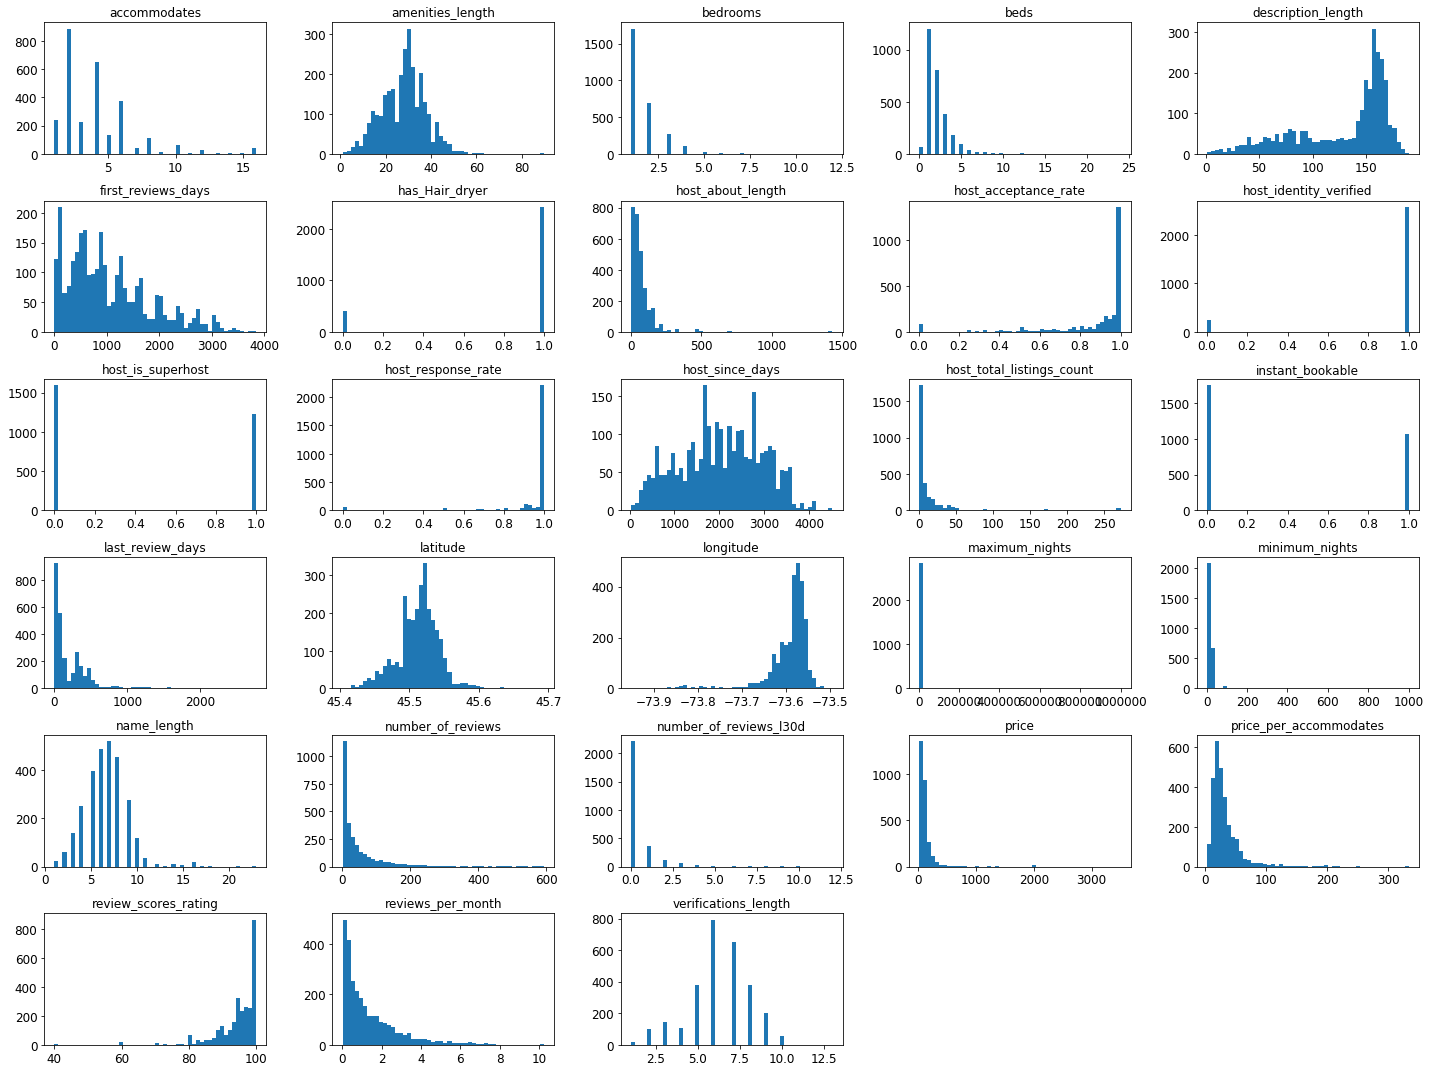

In [23]:
# Get the numerical columns' distribution
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15),grid=False)
save_fig("attribute_histogram_plots")
plt.show()

Saving figure correlation_plot


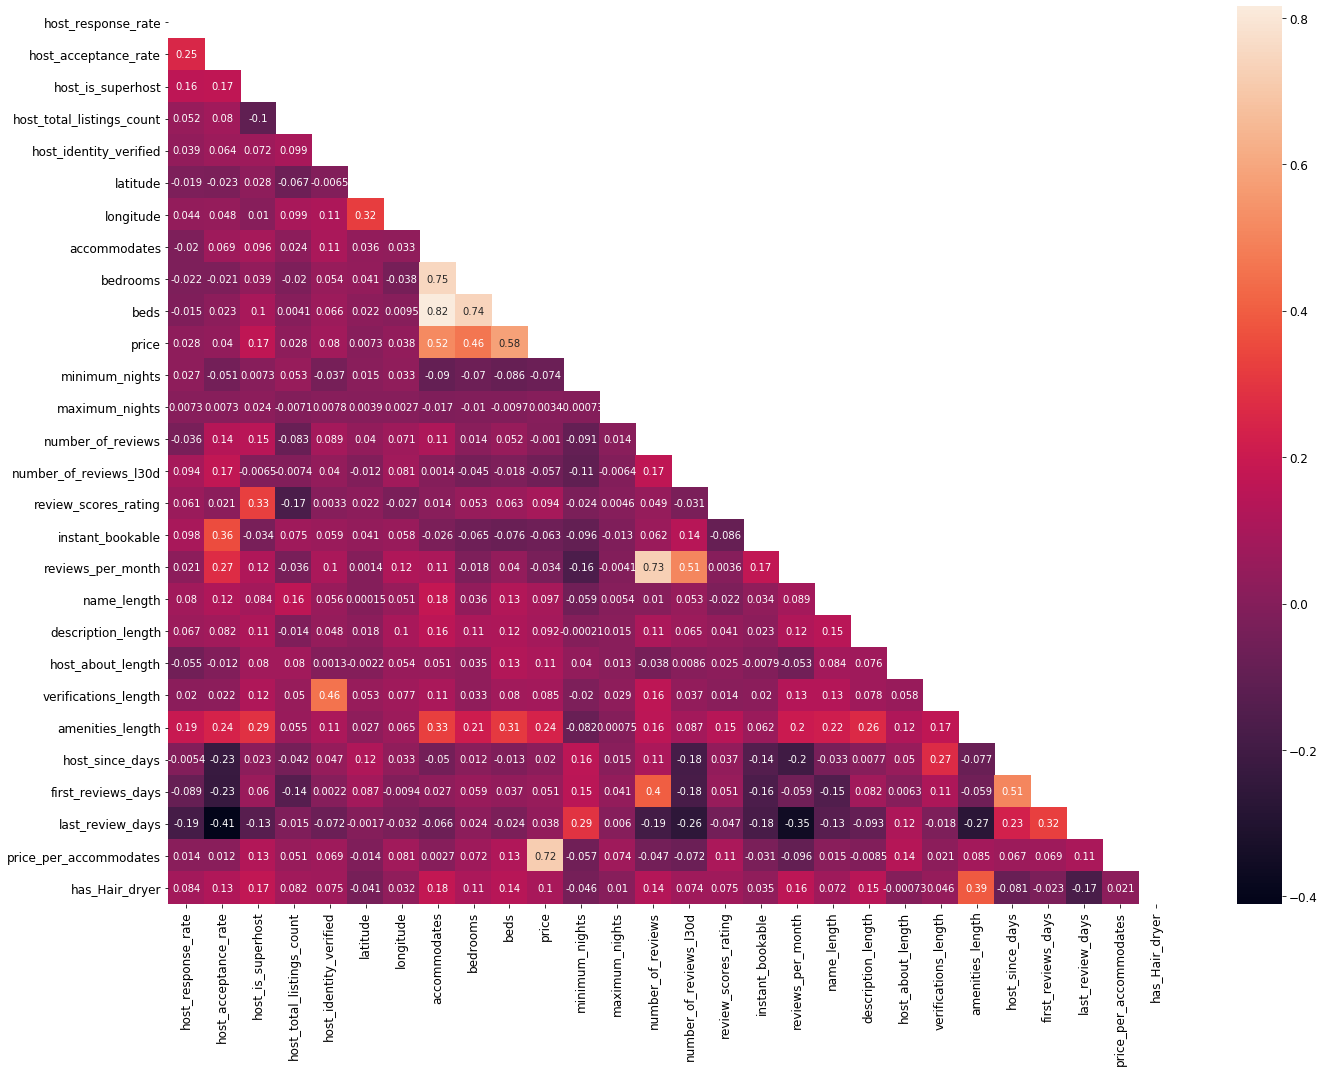

In [24]:
#Plot the correlation plot among the numerical varaibles
import seaborn as sns
matrix = np.triu(df1.corr())
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), annot = True,mask=matrix)
save_fig("correlation_plot")
fig.show()

- From the correlation shown below, we can see that the "beds" has a considerably high correlation (0.82) with "accommadates". Therefore, we can drop one of these two columns to simplify the model.

### 4. Split test and train sets

In [25]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [26]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [27]:
train_set,test_set=split_train_test(df1,0.2)
print("The length of train set is: ",len(train_set))
print("The length of test set is: ",len(test_set))

The length of train set is:  2261
The length of test set is:  565


In [28]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
df1_with_id =df1.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(df1_with_id, 0.2, "index")

In [30]:
test_set.head()

,index,last_scraped,name,description,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer
1,2,2020-12-19,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...,Maryline,2010-05-14,Voyageuse dans l'âme j'aime parcourir le monde...,within an hour,1.00,0.99,...,5,110,20,8,38,3872,3222,48,49.6,1
3,5,2020-12-19,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",Sylvie,2011-02-07,Hope you enjoy this wonderfully lively yet pea...,within a few hours,1.00,0.48,...,5,158,16,5,29,3603,2035,141,65.0,1
11,25,2020-12-19,"Charming aparthotel, little Italie",<b>The space</b><br />This charming and impecc...,Myriam,2011-04-19,"Bonsoir,\nJe suis host (et super host) depuis ...",within a few hours,1.00,0.41,...,4,167,33,7,29,3532,3454,357,33.0,1
14,30,2020-12-19,Sunny appartment on the Plateau,Great apartment located in the heart the Plate...,Sabrina,2011-06-11,"From Montreal, Sabrina works as a trainer and ...",within a few hours,0.63,1.00,...,5,107,55,6,25,3479,3433,356,30.0,1
18,36,2020-12-19,Hogan 64 - Entire Furnished apartment,The apartment is located on the Plateau-Mont-R...,Georges,2011-06-28,"I am a teacher, and a real estate investor, in...",within an hour,1.00,1.00,...,6,150,46,7,11,3462,3055,465,27.5,0


In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [32]:
test_set.head()

,last_scraped,name,description,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer
6577,2020-12-31,"Belle chambre - Centrale, 5min métro Mt-Royal",Je vous propose une chambre calme et confortab...,Morgane,2017-08-03,"Jeune et dynamique, j'adore les voyages!!",within a day,1.00,0.00,0,...,7,159,6,9,26,1246,894,399,18.50,1
5972,2020-12-31,Montréal - be home away from home,"Newly renovated apartment, 2 bedrooms, spaciou...",Chad,2012-03-21,"I'm an IT professional, living in the beautifu...",within a few hours,0.89,0.56,0,...,7,86,11,7,33,3207,823,823,27.25,1
6256,2020-12-19,Beautifully renovated Mile-End one bedroom apt!,This beautifully renovated ground-floor 1 bedr...,Andres,2014-06-12,"I'm a musician and composer, born and raised i...",within a few hours,0.83,1.00,1,...,6,53,10,6,19,2382,699,151,24.50,1
926,2020-12-19,Open plan loft - Villeray,Situated on the first floor of a typical Montr...,Sylvain,2011-06-27,"Papa, publicitaire, passionné de photo, j'habi...",within a few hours,1.00,1.00,1,...,5,175,158,5,28,3463,2085,335,27.50,1
11448,2020-12-19,Huge Loft - Heart of Old-Montreal,Situated right in the hearth of the Old Montre...,Charles,2013-05-12,I love to travel and play music. I’m into poli...,within an hour,0.99,1.00,0,...,6,58,20,6,24,2778,286,15,43.00,0


In [33]:
df1["rating_cat"] = pd.cut(df1["review_scores_rating"],
                               bins=[19, 92, 96, 99, 101],
                               labels=[1, 2, 3, 4])

In [34]:
df1["rating_cat"].value_counts()

3    721
2    721
1    718
4    666
Name: rating_cat, dtype: int64

- As shown below, Shuffle the dataset to avoid the bais batween the train and test sets by rearranging the order of items in a list randomly


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df1, df1["rating_cat"]):
    strat_train_set =df1.iloc[train_index,:]
    strat_test_set = df1.iloc[test_index,:]

In [37]:
strat_train_set.head()

,last_scraped,name,description,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer,rating_cat
33,2020-12-19,Cosy Studio apartment,The studio is only used for airbnb. So it is a...,Omar,2009-09-14,I am originally from Italy. Have moved to Mont...,within a few hours,1.0,0.20,0,...,122,31,6,30,4114,3427,385,45.000000,1,2
7633,2020-12-19,Loft Urbain de L.O.David,Bienvenue dans le petit loft urbain à aire ouv...,Val,2018-07-03,Je suis assistante surintendante pour EBC comp...,within a few hours,1.0,0.78,1,...,156,35,3,36,900,736,267,35.000000,1,3
6446,2020-12-19,convenient room - close to metro station,Please complete your profile fully (with ID an...,Florent,2016-05-05,Eternal student and tutor.\n\nLike to have viv...,within a few hours,1.0,1.00,1,...,122,13,6,28,1689,870,109,12.500000,1,4
12481,2020-12-19,Hotel at Home - L'Opalin #808,Large perfectly designed condo with 2 bedrooms...,Hôtel À La Maison,2015-02-23,En réservant l’une des magnifiques propriétés ...,within an hour,1.0,0.99,0,...,164,118,8,35,2126,57,27,45.000000,1,4
2566,2021-01-01,Natural Zen 1BR~ Downtown Montreal!,Snag this beautiful apartment for yourself rig...,Daniel,2016-04-08,Hello! Bonjour! Buenos dias! to this wonderful...,within an hour,1.0,0.94,0,...,148,213,7,29,1729,1554,316,18.333333,1,2


In [38]:
strat_test_set.head()

,last_scraped,name,description,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer,rating_cat
52,2020-12-19,"Large apartment, terrace and garden",in a traditional building of Montreal's archit...,Christian,2011-08-26,"On aime les voyages, parcourir la planète plus...",within a day,1.0,0.85,1,...,141,49,6,38,3403,3274,351,18.75,1,2
8902,2020-12-31,Ideal Studio In Plateau Mont-Royal!,We'll be more than happy to welcome you in an ...,Omar,2016-03-22,"I like pretty much everything, specially food ...",within an hour,0.8,1.00,1,...,163,75,7,21,1745,580,550,76.00,1,4
12498,2020-12-19,Unique Loft in Downtown Montreal !,"- Tastefully Furnished<br />- Best Location , ...",Rebecca,2019-09-11,"Hey everyone, I travel I lot and I love making...",within an hour,1.0,1.00,0,...,172,57,6,29,465,103,10,17.50,1,1
6361,2020-12-19,"Charmant appart ensoleillé pour 5, métro Jolic...",Logement au deuxième étage situé dans un quart...,Karine,2018-04-12,Je suis artiste verrier et je vis avec mes tro...,within an hour,1.0,1.00,1,...,153,63,7,27,982,873,286,29.80,1,2
11395,2021-01-01,Cozy Room in Downtown Montreal!,Renting a small private room in my downtown co...,Leticia,2012-11-19,"Friendly, fun-loving, adventurous, calm and la...",within a day,1.0,1.00,1,...,166,58,6,41,2965,292,93,30.00,1,4


# Discover and visualize the data to gain insights

### 1. Draw the word cloud for text variables

The word cloud for "description", <br>
which can help us to get the most popular words for hosts to describe thier Airbnb apartments.

Saving figure wordcloud_desription


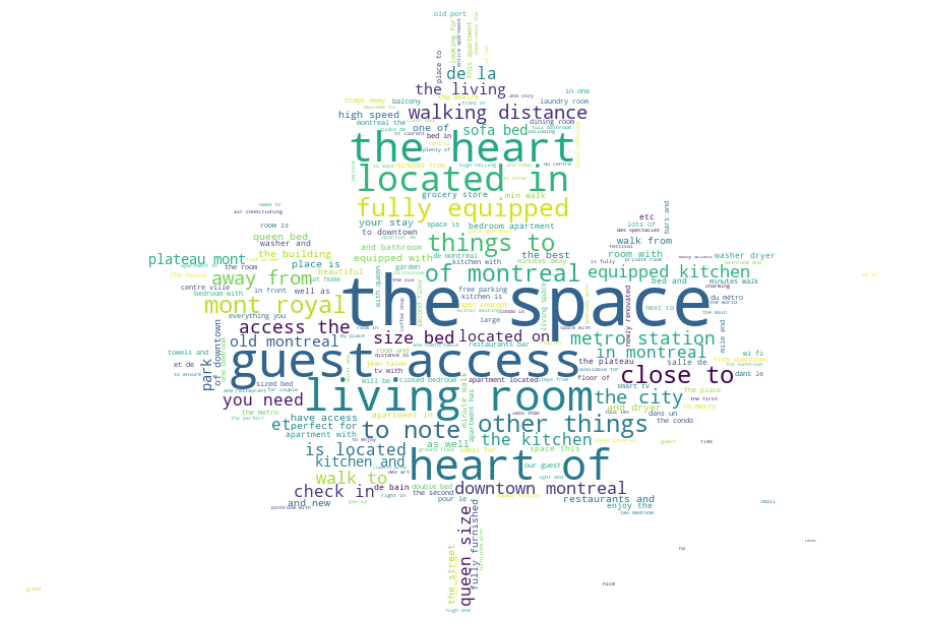

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['description']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment')
mask = np.array(Image.open("canada.jpg"))


wordcloud = WordCloud(width = 800, height = 800, 
            stopwords = stopwords, 
            max_words=1000,
             background_color="white",
            mode="RGBA",
            mask=mask,
            min_font_size = 5).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (13, 13)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
save_fig("wordcloud_desription")
plt.show()

The word cloud for "host_about", <br>
which can help us to get the most popular words for hosts to introduce themselves

Saving figure wordcloud_host_about


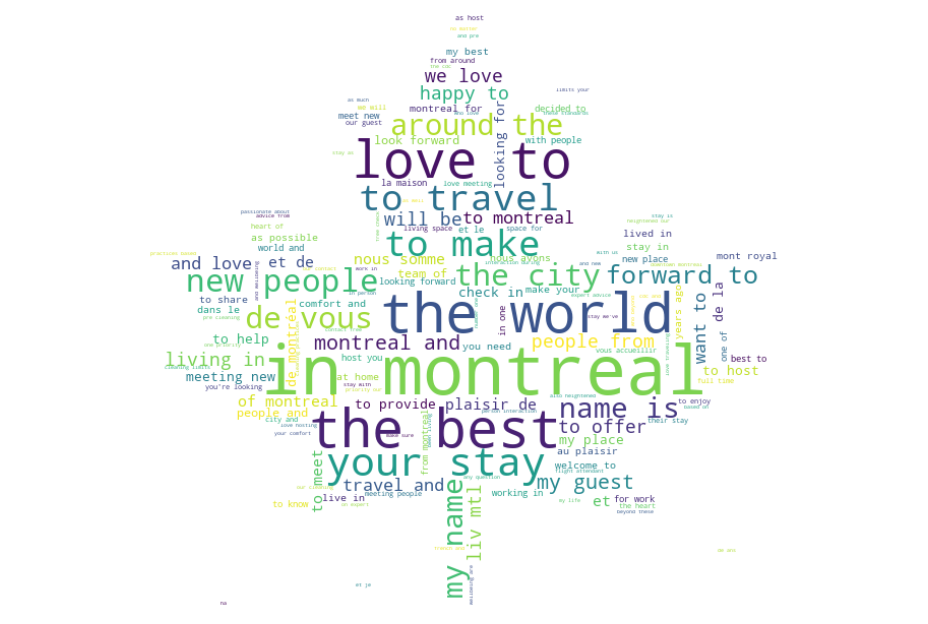

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['host_about']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("canada.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height = 800, 
            stopwords = stopwords, 
            max_words=1000,
             background_color="white",
            mode="RGBA",
            mask=mask,
            min_font_size = 5).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (13, 13)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
save_fig("wordcloud_host_about")
plt.show()

The word cloud for "name", <br>
which can help us to get the most popular words for hosts to entitle thier Airbnb apartments.

Saving figure wordcloud_name


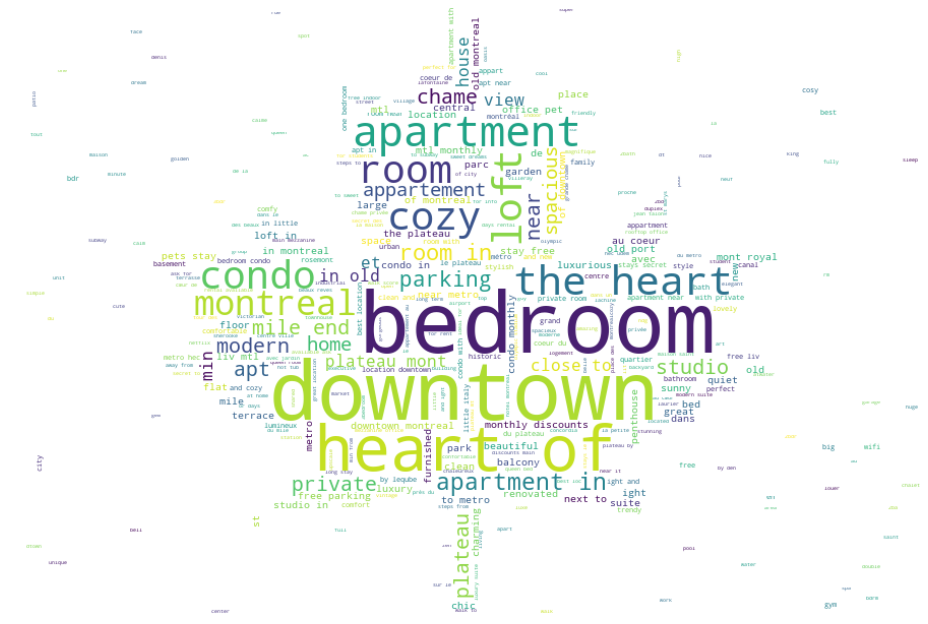

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['name']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("canada.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height = 800, 
            stopwords = stopwords, 
            max_words=500,
             background_color="white",
            mode="RGBA",
            mask=mask,
            min_font_size = 5).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (13, 13)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
save_fig("wordcloud_name")
plt.show()

### 2. Geographic Distribution

Saving figure bad_visualization_plot


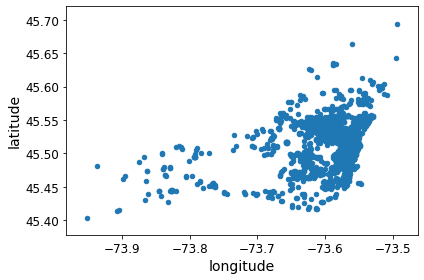

In [42]:
df1.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


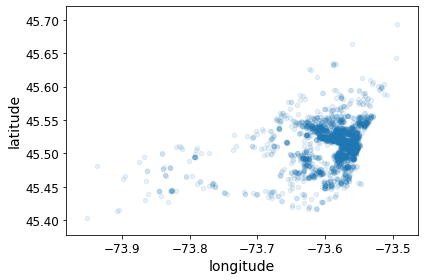

In [43]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure Airbnb_review_rating_scatterplot


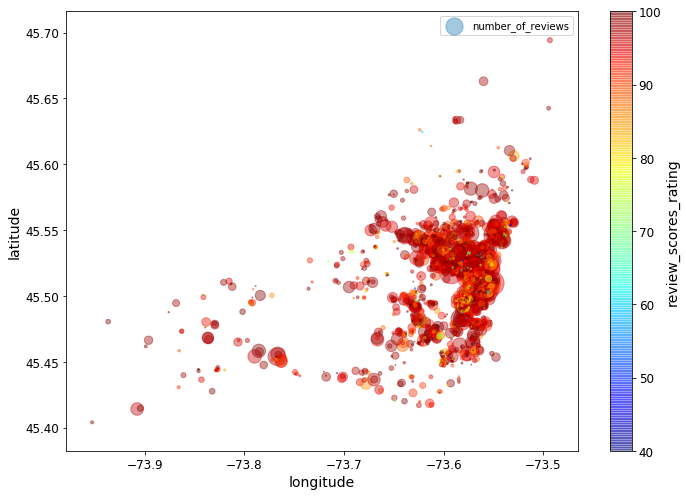

In [44]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df1["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="review_scores_rating", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("Airbnb_review_rating_scatterplot")

Saving figure Montreal_Airbnb_review_rating_scatterplot


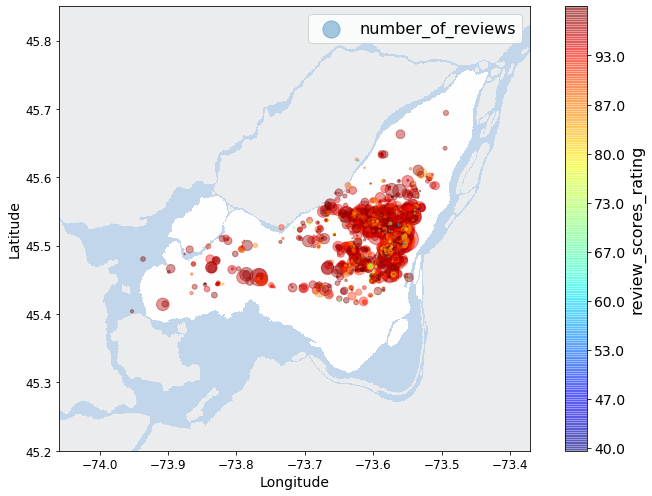

In [45]:
import matplotlib.image as mpimg
california_img=mpimg.imread('Ile_de_Montreal.png')
ax = df1.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df1["number_of_reviews"], label="number_of_reviews",
                       c="review_scores_rating", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-74.06, -73.37, 45.20, 45.85], alpha=0.4,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

rating = df1["review_scores_rating"]
tick_values = np.linspace(rating.min(), rating.max(), 10)
cbar = plt.colorbar(ticks=tick_values/rating.max())
cbar.ax.set_yticklabels([(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('review_scores_rating', fontsize=16)

plt.legend(fontsize=16)
save_fig("Montreal_Airbnb_review_rating_scatterplot")
plt.show()

### 3. Get the correlation value between target variable ("review_scores_rating") and other predictors

In [46]:
corr_matrix2 = df1.corr()

In [47]:
corr_matrix2["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
host_is_superhost            0.326937
amenities_length             0.145193
price_per_accommodates       0.111327
price                        0.094453
has_Hair_dryer               0.075430
beds                         0.062555
host_response_rate           0.061457
bedrooms                     0.053184
first_reviews_days           0.051067
number_of_reviews            0.048851
description_length           0.041383
host_since_days              0.037227
host_about_length            0.024858
latitude                     0.021665
host_acceptance_rate         0.020502
accommodates                 0.014368
verifications_length         0.013865
maximum_nights               0.004580
reviews_per_month            0.003552
host_identity_verified       0.003278
name_length                 -0.021536
minimum_nights              -0.023605
longitude                   -0.027487
number_of_reviews_l30d      -0.030920
last_review_days            -0.046582
instant_book

In [48]:
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
number_of_reviews            0.077354
reviews_per_month            0.049326
latitude                     0.039719
beds                         0.039120
bedrooms                     0.025436
accommodates                 0.022436
minimum_nights               0.006542
maximum_nights               0.000542
number_of_reviews_l30d      -0.002257
longitude                   -0.023580
host_total_listings_count   -0.152649
Name: review_scores_rating, dtype: float64

### Compare the correlation value before and after adding new features, we can see that the new feature of "amenities_length","price_per_accommodates" and "has_hair_dryer" are all the predictors have the high correlation with the target variable

### 4. Draw the scatter matrix plot for the top 4 correlated varibles with review_scores_rating

Saving figure scatter_matrix_plot


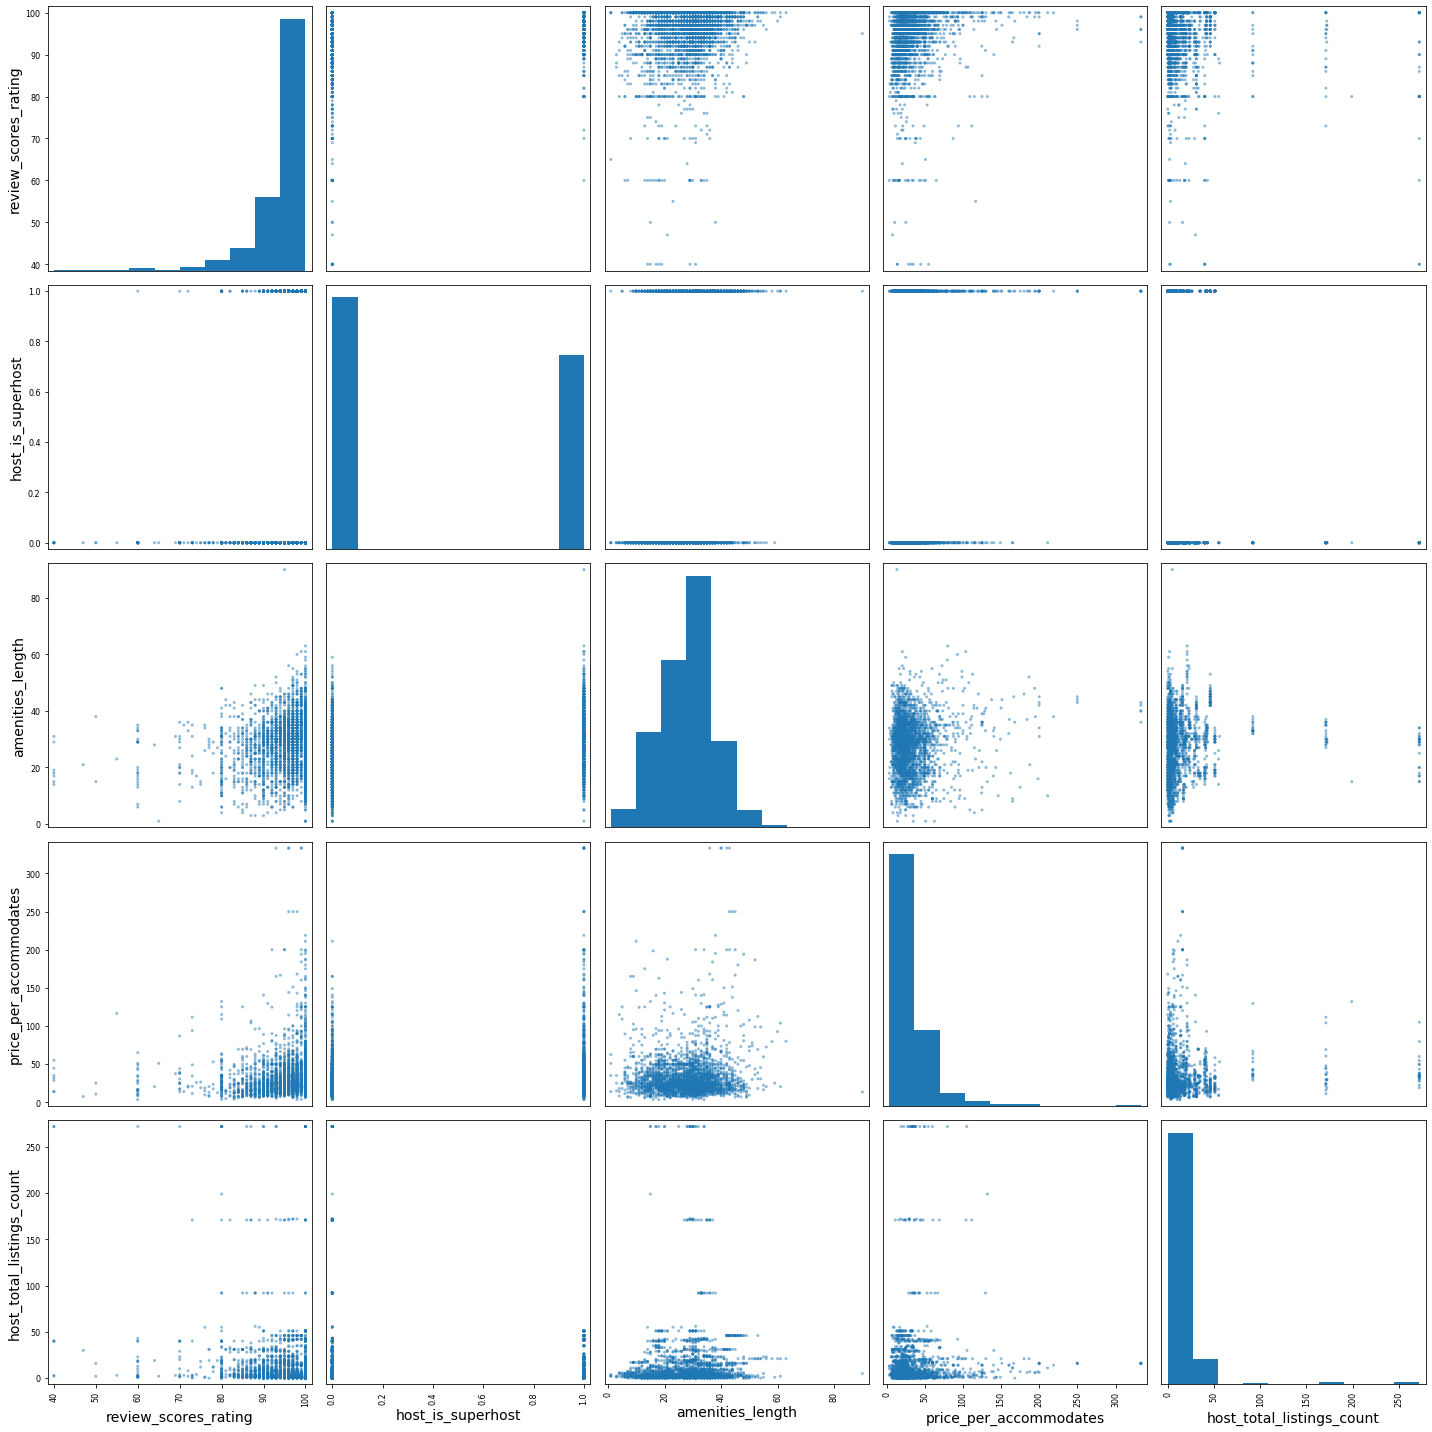

In [49]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["review_scores_rating", "host_is_superhost", "amenities_length",
              "price_per_accommodates",'host_total_listings_count']
scatter_matrix(df1[attributes], figsize=(20, 20))
save_fig("scatter_matrix_plot")

Saving figure listing_counts_vs_rating_scatterplot


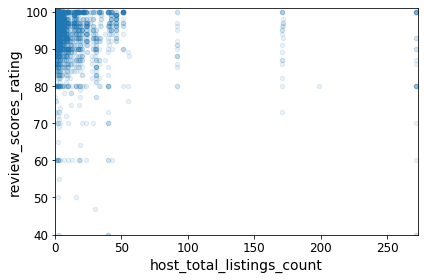

In [50]:
df1.plot(kind="scatter", x="host_total_listings_count", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
save_fig("listing_counts_vs_rating_scatterplot")

Saving figure income_vs_house_value_scatterplot


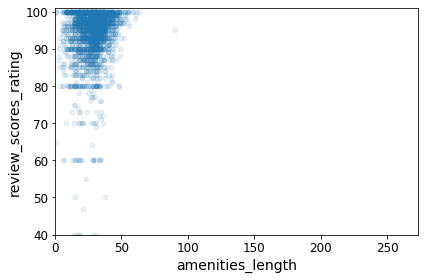

In [51]:
df1.plot(kind="scatter", x="amenities_length", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
save_fig("income_vs_house_value_scatterplot")

In [52]:
df1.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,...,name_length,description_length,host_about_length,verifications_length,amenities_length,host_since_days,first_reviews_days,last_review_days,price_per_accommodates,has_Hair_dryer
count,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,...,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000
mean,0.938079,0.859384,0.435244,12.552725,0.910828,45.513008,-73.590976,4.031139,1.635173,2.125619,...,6.623142,128.859165,71.738854,6.249115,27.974168,2037.207714,1044.129512,233.381104,33.466798,0.857749
std,0.185797,0.237705,0.495877,30.901617,0.285042,0.030439,0.049067,2.770723,1.012989,1.771595,...,2.355460,43.891031,93.148159,1.778597,9.596886,905.520561,784.143916,321.270093,28.898677,0.349369
min,0.000000,0.000000,0.000000,0.000000,0.000000,45.404050,-73.952730,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,23.000000,1.000000,1.000000,3.400000,0.000000
25%,1.000000,0.840000,0.000000,1.000000,1.000000,45.496310,-73.603952,2.000000,1.000000,1.000000,...,5.000000,94.000000,24.000000,5.000000,21.000000,1390.250000,452.500000,36.000000,18.125000,1.000000
50%,1.000000,0.970000,0.000000,3.000000,1.000000,45.516685,-73.577540,4.000000,1.000000,2.000000,...,7.000000,150.000000,52.000000,6.000000,29.000000,2049.000000,867.500000,105.000000,25.000000,1.000000
75%,1.000000,1.000000,1.000000,11.000000,1.000000,45.531035,-73.563815,5.000000,2.000000,3.000000,...,8.000000,162.000000,88.750000,7.000000,34.000000,2752.000000,1515.500000,321.000000,38.500000,1.000000
max,1.000000,1.000000,1.000000,272.000000,1.000000,45.694170,-73.493570,16.000000,12.000000,24.000000,...,23.000000,190.000000,1429.000000,13.000000,90.000000,4518.000000,3846.000000,2770.000000,333.166667,1.000000


#### 5. Geometric plot to show the Airbnb apartments' distribution in Montreal
We can see that the The block of "Ville-Marie" and "Le Plateau-Mont-Royal" have a higher amount of Airbnb's apartments compare to other blocks in Montreal

In [53]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [54]:
df_places = gpd.read_file('limadmin.geojson')

df_places['num']=[31,13,11,653,777,4,154,5,5,14,5,4,1,10,0,34,9,6,2,4,14,136,173,298,23,1,148,20,0,7,4,0,68,1]

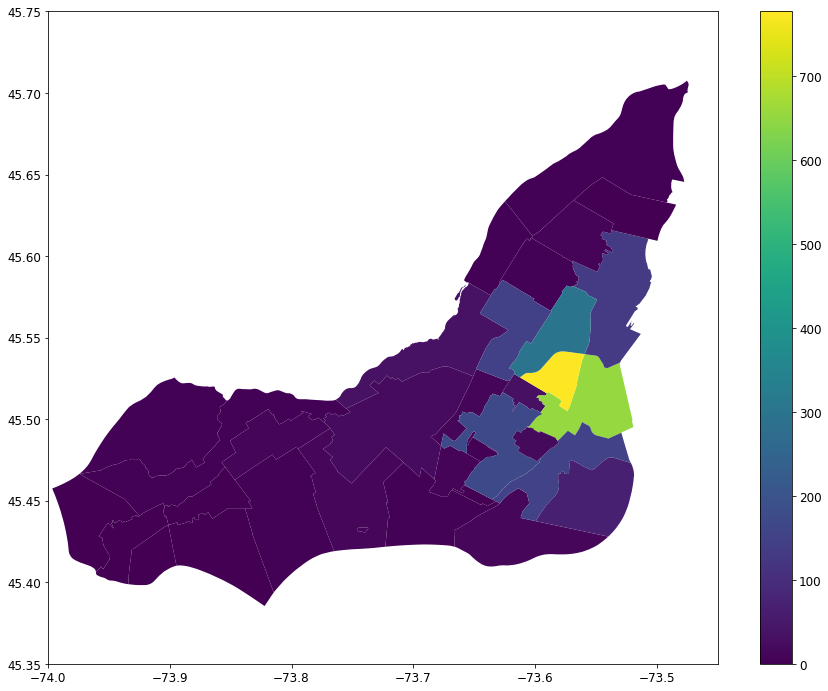

In [55]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='num',ax=ax,legend=True)
ax.set_xlim([-74, -73.45])
ax.set_ylim([45.35, 45.75])
plt.show()

# Prepare the data for Machine Learning algorithms

### 1. Drop target value in train set

In [56]:
df_labels = strat_train_set["review_scores_rating"]
# drop labels for training set(rating_cat is subset of review_scores_rating)
df_train = strat_train_set.drop(["review_scores_rating",'rating_cat'], axis=1) 


### 2. Already filled the missing data for numerical columns by using "impute" package in sklearn in the previous section

In [57]:
df_num_train=df_train.iloc[:,np.r_[7:11,12,14:16,17,19:21,22:27,29:41]]

### 3. Processing the categorical columns (OneHotEncoder)

In [58]:
df_cat_train = df_train.iloc[:,np.r_[13,16,18]]

In [59]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df_cat_train)
df_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [60]:
cat_encoder.categories_

[array(['Ahuntsic-Cartierville', 'Anjou', "Baie-d'Urfé", 'Beaconsfield',
        'Côte-Saint-Luc', 'Côte-des-Neiges-Notre-Dame-de-Grâce',
        'Dollard-des-Ormeaux', 'Dorval', 'Hampstead',
        "L'Île-Bizard-Sainte-Geneviève", 'LaSalle', 'Lachine',
        'Le Plateau-Mont-Royal', 'Le Sud-Ouest',
        'Mercier-Hochelaga-Maisonneuve', 'Mont-Royal', 'Montréal-Nord',
        'Montréal-Ouest', 'Outremont', 'Pierrefonds-Roxboro',
        'Pointe-Claire', 'Rivière-des-Prairies-Pointe-aux-Trembles',
        'Rosemont-La Petite-Patrie', 'Saint-Laurent', 'Saint-Léonard',
        'Verdun', 'Ville-Marie', 'Villeray-Saint-Michel-Parc-Extension',
        'Westmount'], dtype=object),
 array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
       dtype=object),
 array(['0 baths', '0 shared baths', '1 bath', '1 private bath',
        '1 shared bath', '1.5 baths', '1.5 shared baths', '11.5 baths',
        '2 baths', '2 shared baths', '2.5 baths', '2.5 shared baths',
        '3

### 4. Add new attributes (Already added the new features in the previous section :
'name_length'<br />
'description_length'<br />
'host_about_length'<br />
'verifications_length'<br />
'amenities_length' <br />
'host_since_days'<br />
'first_reviews_days'<br />
'last_review_days'<br />
'price_per_accommodates'<br />
'has_Hair_dryer'

### 5. Build a pipeline for preprocessing the numerical columns

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num_train)

In [62]:
df_num_tr 

array([[ 0.33093128, -2.75829111, -0.86792691, ...,  0.49431974,
         0.40654509,  0.40982759],
       [ 0.33093128, -0.32945328,  1.15217074, ...,  0.11295946,
         0.05798017,  0.40982759],
       [ 0.33093128,  0.59183003,  1.15217074, ..., -0.39767548,
        -0.72629089,  0.40982759],
       ...,
       [ 0.33093128,  0.42432397, -0.86792691, ..., -0.60128308,
         0.31940386,  0.40982759],
       [ 0.33093128,  0.54995351, -0.86792691, ..., -0.73055775,
         1.73109179,  0.40982759],
       [ 0.33093128, -3.5958214 , -0.86792691, ...,  0.44584173,
        -0.25572825,  0.40982759]])

### 6. Build a pipeline for preprocessing the train dataset

In [63]:
from sklearn.compose import ColumnTransformer
a=list(df_num_train.columns)
b=list(df_cat_train.columns)
name=a+b

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, a),
        ("cat", OneHotEncoder(sparse=False),b),
    ])

df_prepared = full_pipeline.fit_transform(df_train[name])

In [64]:
df_prepared 

array([[ 0.33093128, -2.75829111, -0.86792691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128, -0.32945328,  1.15217074, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128,  0.59183003,  1.15217074, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.33093128,  0.42432397, -0.86792691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128,  0.54995351, -0.86792691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128, -3.5958214 , -0.86792691, ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
df_prepared.shape

(2260, 80)

### 6.1 Just for reference (old solution)

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

a=list(df_num_train.columns)
b=list(df_cat_train.columns)
name=a+b

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(a)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(b)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

old_df_prepared = old_full_pipeline.fit_transform(df_train[name])
old_df_prepared

array([[ 0.33093128, -2.75829111, -0.86792691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128, -0.32945328,  1.15217074, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128,  0.59183003,  1.15217074, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.33093128,  0.42432397, -0.86792691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128,  0.54995351, -0.86792691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33093128, -3.5958214 , -0.86792691, ...,  0.        ,
         0.        ,  0.        ]])

### 6.2 The result is the same as with the ColumnTransformer:

In [67]:
np.allclose(df_prepared, old_df_prepared)

True

# Select and train a model

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# let's try the full preprocessing pipeline on a few training instances
some_data = df_train.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [95.59765625 99.56640625 97.62890625 89.890625   91.203125  ]


Compare the predicted review rating with the actual review rating

In [70]:
print("Labels:", list(some_labels))

Labels: [95.0, 99.0, 100.0, 100.0, 93.0]


In [71]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.344724808132145

In [72]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

4.079715154867257

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [74]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 9.71473655  7.49099755  8.68678174 10.1891405   8.67250768 10.14409458
 10.86461334  8.14905391  9.91891908  8.25800765]
Mean: 9.208885256502986
Standard deviation: 1.0428723675693854


In [77]:
lin_scores = cross_val_score(lin_reg,df_prepared,df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [7.28674268e+10 3.92832747e+11 1.32066721e+11 7.28467983e+00
 6.68126326e+00 7.71901811e+00 5.29130299e+11 2.04404602e+11
 6.62281011e+11 6.51321428e+00]
Mean: 199358280577.75757
Standard deviation: 232380691656.7905


In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_prepared,df_labels)

RandomForestRegressor(random_state=42)
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels,df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.430760123657014

In [79]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [6.27083698 5.17675557 5.79182873 7.14221276 6.97836299 7.75953216
 7.57830552 5.15380021 6.62745546 5.92009687]
Mean: 6.439918726329509
Standard deviation: 0.8845405197128505


In [80]:
scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     1.993583e+11
std      2.449508e+11
min      6.513214e+00
25%      7.393264e+00
50%      1.024671e+11
75%      3.457257e+11
max      6.622810e+11
dtype: float64

In [81]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)
housing_predictions = svm_reg.predict(df_prepared)
svm_mse = mean_squared_error(df_labels, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

2.430760123657014

### 1. Apply GridSearchCV to tune the hyperparameters

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30,50,70,100], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

Best performance model:

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 70}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.412253886458561 {'max_features': 2, 'n_estimators': 30}
6.423939329519014 {'max_features': 2, 'n_estimators': 50}
6.390103414362312 {'max_features': 2, 'n_estimators': 70}
6.379736224520257 {'max_features': 2, 'n_estimators': 100}
6.426075713577822 {'max_features': 4, 'n_estimators': 30}
6.4386407784928865 {'max_features': 4, 'n_estimators': 50}
6.387540453911579 {'max_features': 4, 'n_estimators': 70}
6.376919971057742 {'max_features': 4, 'n_estimators': 100}
6.380729634719107 {'max_features': 6, 'n_estimators': 30}
6.350045807549389 {'max_features': 6, 'n_estimators': 50}
6.298021593435365 {'max_features': 6, 'n_estimators': 70}
6.325282355293327 {'max_features': 6, 'n_estimators': 100}
6.418180779244943 {'max_features': 8, 'n_estimators': 30}
6.372936374872458 {'max_features': 8, 'n_estimators': 50}
6.328469902226969 {'max_features': 8, 'n_estimators': 70}
6.334328233089578 {'max_features': 8, 'n_estimators': 100}
7.398358113463178 {'bootstrap': False, 'max_features': 2, 'n_estima

In [86]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057047,0.002396,0.003791,3.955604e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-31.367833,-46.290561,...,-41.117000,6.714922,12,-6.268787,-5.803162,-5.257426,-5.959257,-6.208738,-5.899474,0.362522
1,0.094363,0.002863,0.005778,3.972300e-04,2,50,NaN,"{'max_features': 2, 'n_estimators': 50}",-31.271560,-45.755670,...,-41.266997,6.980955,14,-6.007586,-5.579199,-5.141369,-5.728427,-5.860017,-5.663320,0.296970
2,0.131058,0.003811,0.008186,7.338223e-04,2,70,NaN,"{'max_features': 2, 'n_estimators': 70}",-31.058779,-44.921664,...,-40.833422,6.948342,11,-6.052155,-5.593381,-5.116435,-5.630135,-5.672797,-5.612981,0.297889
3,0.189111,0.007172,0.010755,3.914548e-04,2,100,NaN,"{'max_features': 2, 'n_estimators': 100}",-30.791306,-44.052607,...,-40.701034,7.122212,8,-5.974287,-5.609675,-5.227308,-5.648540,-5.843226,-5.660607,0.253863
4,0.066436,0.001028,0.003397,4.962628e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-31.322758,-47.201867,...,-41.294449,6.938968,15,-6.424448,-5.861648,-5.212388,-6.063394,-6.196962,-5.951768,0.412507
5,0.112506,0.002301,0.006185,3.984740e-04,4,50,NaN,"{'max_features': 4, 'n_estimators': 50}",-30.893670,-46.390365,...,-41.456095,7.296535,16,-6.204919,-5.634906,-5.013517,-5.838258,-5.836136,-5.705547,0.391901
6,0.154402,0.002621,0.007789,3.892986e-04,4,70,NaN,"{'max_features': 4, 'n_estimators': 70}",-30.254060,-44.678512,...,-40.800673,7.268769,10,-6.215441,-5.599145,-5.055643,-5.640954,-5.596375,-5.621512,0.367279
7,0.226401,0.003841,0.011364,1.013960e-03,4,100,NaN,"{'max_features': 4, 'n_estimators': 100}",-30.075090,-44.247067,...,-40.665108,7.355783,7,-6.106378,-5.628500,-5.077029,-5.639205,-5.752855,-5.640793,0.330851
8,0.082978,0.004652,0.003391,4.889282e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-30.568655,-43.275079,...,-40.713711,7.082407,9,-6.368129,-6.090764,-5.215920,-5.934404,-6.047243,-5.931292,0.385089
9,0.138829,0.003179,0.005578,7.942376e-04,6,50,NaN,"{'max_features': 6, 'n_estimators': 50}",-30.828643,-42.759656,...,-40.323082,6.894577,5,-5.913778,-5.717996,-5.086589,-5.739517,-5.768207,-5.645217,0.287578


### 2. Use RandomizedSearchCV to tune the parameters

In [87]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [88]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.346786594042333 {'max_features': 7, 'n_estimators': 180}
6.493782519156024 {'max_features': 5, 'n_estimators': 15}
6.433579744225262 {'max_features': 3, 'n_estimators': 72}
6.457931036852618 {'max_features': 5, 'n_estimators': 21}
6.359134730123832 {'max_features': 7, 'n_estimators': 122}
6.429247551739229 {'max_features': 3, 'n_estimators': 75}
6.414420355963619 {'max_features': 3, 'n_estimators': 88}
6.352272253654986 {'max_features': 5, 'n_estimators': 100}
6.386417555403626 {'max_features': 3, 'n_estimators': 150}
7.674633541739957 {'max_features': 5, 'n_estimators': 2}


### 3. get the feature importances

In [89]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.96385728e-02, 2.80698852e-02, 4.77091238e-02, 5.03066272e-02,
       4.47231460e-03, 4.56081787e-02, 4.99467121e-02, 2.70149010e-02,
       1.07312912e-02, 1.69069247e-02, 4.81183441e-02, 2.39227289e-02,
       2.39432946e-02, 4.46629694e-02, 8.33623522e-03, 1.05494780e-02,
       4.41689793e-02, 2.79470832e-02, 3.65598573e-02, 3.52664039e-02,
       2.47843842e-02, 4.71817120e-02, 4.72079229e-02, 6.35497913e-02,
       4.69976605e-02, 6.38742234e-02, 7.13758497e-03, 1.83080202e-03,
       4.20600902e-06, 1.70246566e-05, 6.22261792e-05, 1.42127914e-04,
       3.27199835e-03, 2.40525937e-03, 1.84889842e-04, 4.67014506e-04,
       7.41535550e-05, 2.20813447e-03, 7.83593375e-04, 6.05479313e-03,
       3.64200480e-03, 3.24103827e-03, 1.05808514e-04, 3.93532620e-03,
       2.30813724e-05, 2.43858417e-04, 1.29827772e-03, 2.28168412e-04,
       5.91889685e-05, 2.71623004e-03, 3.53856368e-03, 2.97389057e-04,
       4.98796555e-04, 9.78032995e-03, 2.32307078e-03, 1.98511166e-04,
      

In [90]:
#Since the extra attribs already included into the num_attribs. therefore,num_attribs=original_num_attribs+extra_attribs
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = a +  b
sorted(zip(feature_importances, attributes), reverse=True)

[(0.06387422335367438, 'price_per_accommodates'),
 (0.06354979127171945, 'first_reviews_days'),
 (0.050306627160003045, 'host_total_listings_count'),
 (0.04994671208557718, 'longitude'),
 (0.04811834409181676, 'price'),
 (0.047709123767892485, 'host_is_superhost'),
 (0.047207922854183716, 'host_since_days'),
 (0.04718171197999329, 'amenities_length'),
 (0.046997660496582244, 'last_review_days'),
 (0.04560817869938374, 'latitude'),
 (0.04466296940533255, 'number_of_reviews'),
 (0.04416897930922682, 'reviews_per_month'),
 (0.036559857274709485, 'description_length'),
 (0.0352664039051736, 'host_about_length'),
 (0.028069885218061984, 'host_acceptance_rate'),
 (0.027947083240932546, 'name_length'),
 (0.027014900989781432, 'accommodates'),
 (0.024784384173218436, 'verifications_length'),
 (0.023943294631599884, 'maximum_nights'),
 (0.023922728857901688, 'minimum_nights'),
 (0.019638572803856787, 'host_response_rate'),
 (0.016906924711927798, 'beds'),
 (0.010731291242998988, 'bedrooms'),
 (

# Run the final model on the test set

In [91]:
final_model = grid_search.best_estimator_

y_test = strat_train_set["review_scores_rating"]
# drop labels for training set(rating_cat is subset of review_scores_rating)
X_test = strat_train_set.drop(["review_scores_rating",'rating_cat'], axis=1) 
a=list(df_num_train.columns)
b=list(df_cat_train.columns)
name=a+b

X_test_prepared = full_pipeline.transform(X_test[name])
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [92]:
final_rmse

2.3970567568079186

We can compute a 95% confidence interval for the test RMSE:

In [93]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.16004305, 2.61265692])

We could compute the interval manually like this:

In [94]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2.1600430535533914, 2.6126569230407397)

Alternatively, we could use a z-scores rather than t-scores:

In [95]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(2.16017700646653, 2.6125461702045127)

# Extra material

### 1. A full pipeline with both preparation and prediction

In [96]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(df_train[name], df_labels)
full_pipeline_with_predictor.predict(some_data)

array([95.59765625, 99.56640625, 97.62890625, 89.890625  , 91.203125  ])

### 2. Model persistence using joblib

In [97]:
my_model = full_pipeline_with_predictor
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF


### 3. Example SciPy distributions for RandomizedSearchCV

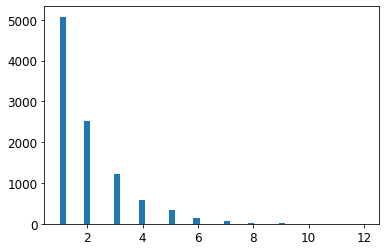

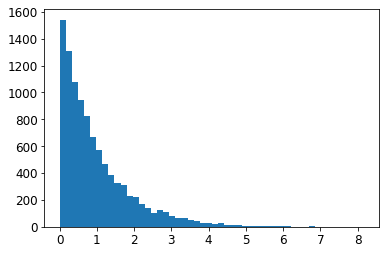

In [98]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()